In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import plot_confusion_matrix

import tensorflow as tf

/Users/coreyhannum/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
autompg = pd.read_csv("/Users/coreyhannum/Desktop/Auto-MPG/auto-mpg.csv")

In [3]:
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
autompg = autompg[autompg.horsepower != '?']

In [5]:
autompg['horsepower'].max()

'98'

12.533333 - for each mpg category

In [6]:
autompg['mpgCat'] = "low"

In [7]:
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,mpgCat
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,low
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,low
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,low
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,low
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,low


In [8]:
autompg.loc[autompg.mpg >= 21.5, 'mpgCat'] = "average"
autompg.loc[autompg.mpg >= 34, 'mpgCat'] = "high"

In [9]:
autompg['low'] = 0
autompg['average'] = 0
autompg['high'] = 0

In [10]:
autompg.loc[autompg.mpgCat == 'low', 'low'] = 1
autompg.loc[autompg.mpgCat == 'average', 'average'] = 1
autompg.loc[autompg.mpgCat == 'high', 'high'] = 1

In [11]:
autompg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,mpgCat,low,average,high
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,average,0,1,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,high,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,average,0,1,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,average,0,1,0
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,average,0,1,0


In [12]:
autompg.to_csv('/Users/coreyhannum/Desktop/Auto-MPG/auto-mpg-New.csv')

In [13]:
X = autompg[['cylinders', 'displacement', 'horsepower', 'weight', 'model year']].copy()
y = autompg[['low', 'average', 'high']].copy()

In [14]:
y.head()

,low,average,high
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
X_test.shape

(98, 5)

In [17]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

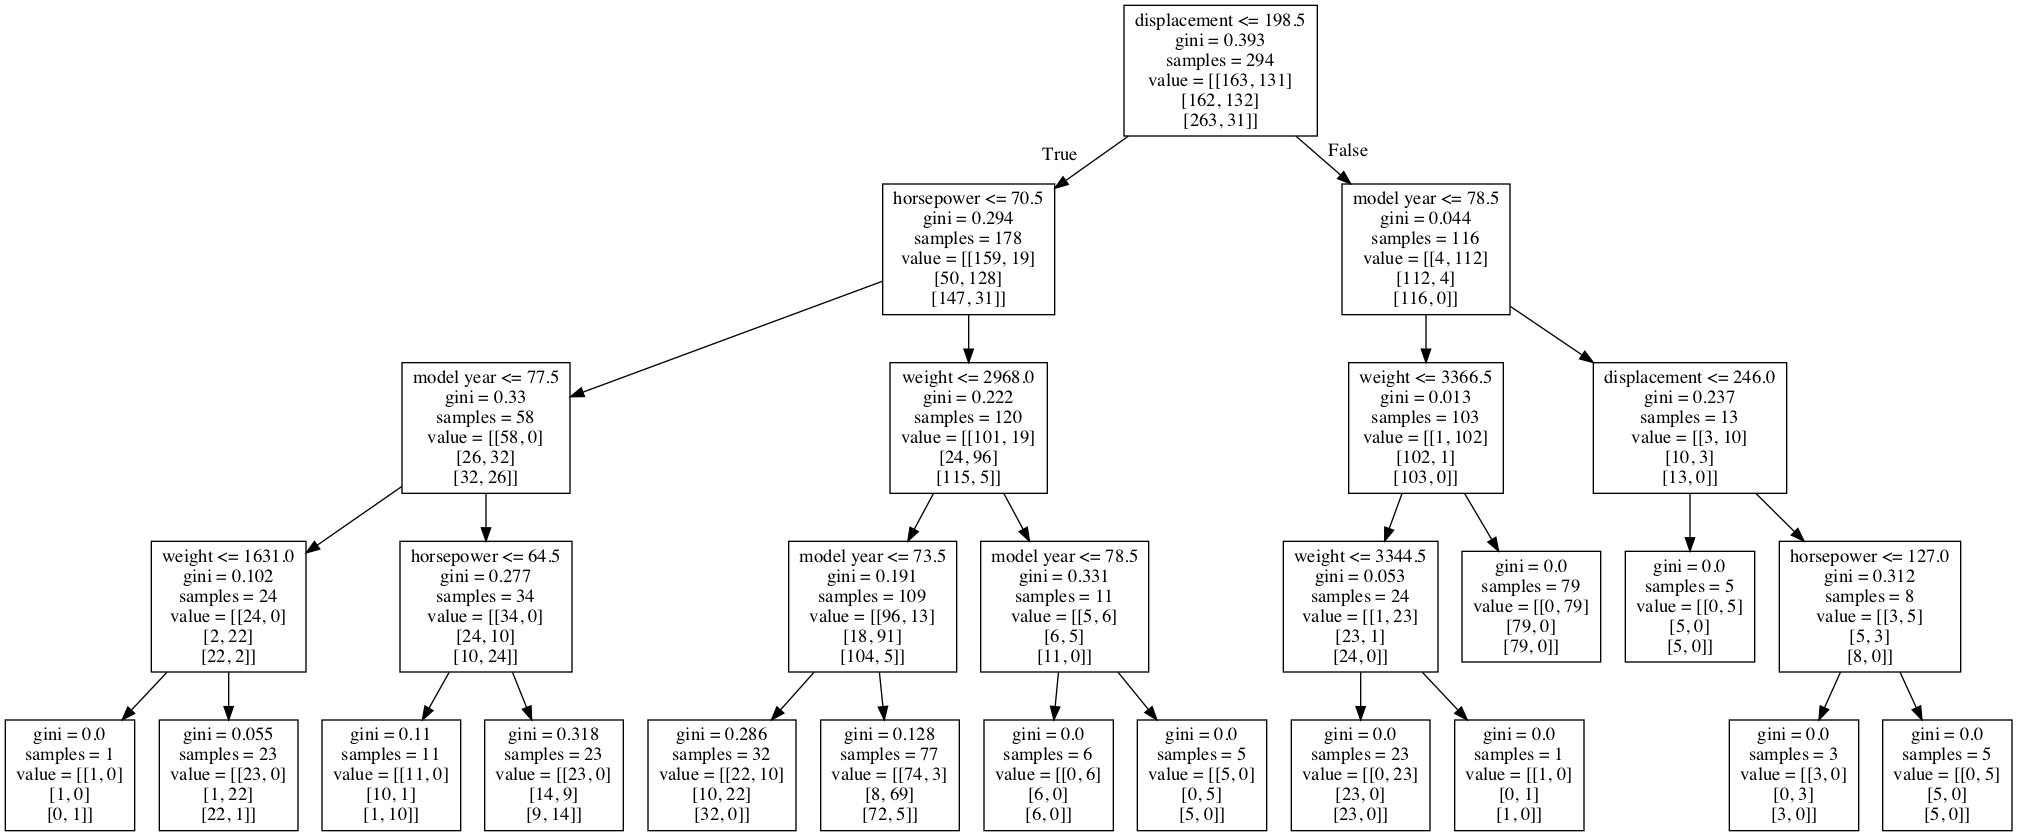

In [18]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=list(X))
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
y_pred = dt.predict(X_test)

%81.6 accuracy 

In [21]:
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(dt, X_test, y_test)
#     disp.ax_.set_title(title)

In [23]:
y_true = np.array(y_test).argmax(axis=1)
y_pred = np.array(y_pred).argmax(axis=1)
confusion_matrix(y_true, y_pred)

array([[44,  4,  0],
       [ 6, 29,  2],
       [ 0,  6,  7]])

In [24]:
parameters = {'max_depth':range(2,15)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(X=X, y=y)
cvdt = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8440765985069782 {'max_depth': 3}


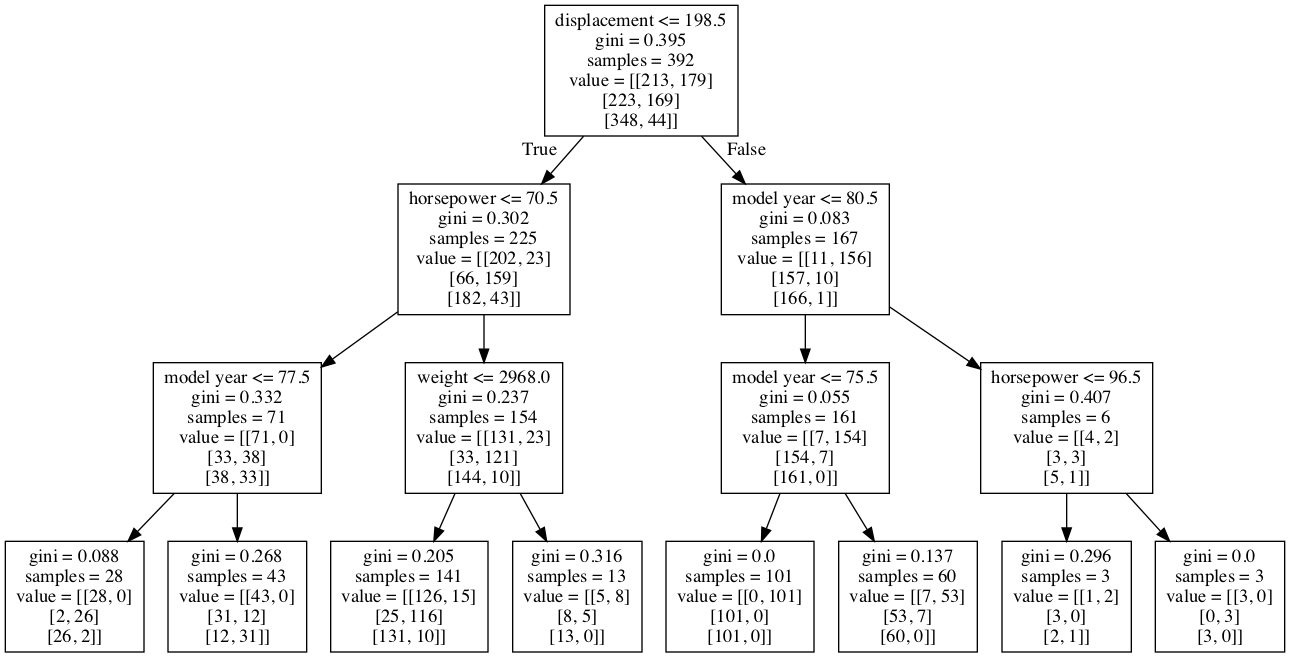

In [25]:
dot_data = StringIO()
export_graphviz(cvdt, out_file=dot_data, feature_names=list(X))
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
y_pred = cvdt.predict(X_test)

In [27]:
X_test.shape

(98, 5)

%85.7 accuracy

In [28]:
y_true = np.array(y_test).argmax(axis=1)
y_pred = np.array(y_pred).argmax(axis=1)
confusion_matrix(y_true, y_pred)

array([[46,  2,  0],
       [ 4, 31,  2],
       [ 1,  5,  7]])